# Modeling
Note: To avoid super long execution time, I divided the modeling part into separate notebooks：Base_Model.ipynb, Baggining_Model.ipynb and Boosting_Model.ipynb. In this session, I may only discuss the outputs from the other three notebooks. More coding details will be showed in the other three notebooks.

Main methodologies of the modeling:
- Try different multiple models to find the best one
The main catogories of models will be divided into simple models and ensemble models.
For the simple models, we will try to use the decision tree with hyperparameter tuning and cross validation.
For the ensemble models, we will try to use the bagging (RandomForestClassifier) and boosting (GradientBoost) with hyperparameter tuning and cross validation.
- Discuss and compare if the ensemble method can improve the model performance with imbalance classes distribution in target variable.
- Discuss and compare if the resampling method can improve the model performance with imbalance classes distribution in target variable.
Strategies for resampling:
          1. Use SMOTE to resample the data to make the classes in the target variable balanced.
          2. Combine the SMOTE  and undersampling methods.



### Work flows for modeling
##### Note: I may omit some explanations in the other three notebooks since I will explain how I constructed the models in this notebook.
Step1: Split final dataset into train and test dataset.
Step2: Create an instance for the model (decision tree, random forest, gradient boosting)
Step3: Confirm the hyperparameters of the model I need to tune
Step4: Tune the hyperparameters of the model using GridSearchCV and set the scoring function to be 'roc_auc'
Step5: Fit the model using the best parameters retrieved from hypyerparameter tuning
Step6: Make predictions on the test dataset using the fitted model
Step7: Evaluate the model using the test dataset and predicted results
Step8: Plot the confusion matrix and classification report
Step9: Try SMOTE with the well-tuned model
Step10: Repeat the steps 5-8
Step11: Try the SMOTE+undersampling method with the well-tuned model (first use SMOTE to make the ratio of classes as 90:10 and then use undersampling to make the ratio of classes as 50:50)
Step12 : Repeat the steps 5-8
Step13 : Try a different model and repeat steps 1-12 (decision tree, random forest, gradient boosting)

### Why imbalance classes distribution in target variable matters?
#### Causes of imbalance classes distribution in target variable
- The imbalance classes distribution in target variable can be caused by objective reasons :
  1. The data is not clean.
  2. The data is not well-organized.
  3. The data is not well-sampled.
  4. The data is not well-labeled.
- The imbalance classes distribution in target variable can be caused by subjective reasons :
However, imbalanced outcomes may be the nature of worlds.
For example, if a bank has a half of customers who can repay the loan or credits on time, what will happen to this bank? This bank may be hard to maintain their financial business and profits. Another example, the majority of wealth in worlds may be controlled by the only 1% of the population. As such, it is often infeasible or intractable to simply collect more samples from the domain in order to improve the class distribution. Instead, a model is required to learn the difference between the classes.
#### How imbalance data affect classification models performance?
- We may use a bunch of mathematics fomulas to show how the imbalance data affect the classification models performance. However, how we explain this phenomenon to the non-technique people in plain words about the nature of this problem since mathematics is not a good language to them. In fact, many problems of machine learning models are like problems in our daily lives.

- For example, if you consider the question of why most of us can only write by a single hand, left or right hand. You may answer that since the one-hand writing is enough to handle the majority of tasks in our life. Now, try to use the hand you hardly use to write, what will happen to your writing? You still can write by the hand you hardly use, but it may let you feel uncomfortable. This is because we assign all the writing training process to the hand we always use and the other hand hardly get trained how to write. But you still can write by the hand you hardly use, this is because you have learned the majority of characteristics of letters and numbers and this ability become inner to your mind. If you start over and learn how to use dual hand to write and give two hands equal training opportunity, it is more possible to write by two hands after several year.
- Similarly, if we give classification models the data with the imbalanced classes distribution, then model's classification ability will be also imbalanced to classify two classes.
#### Terms of imbalance classification problem:
- Majority Class:
The class (or classes) in an imbalanced classification predictive modeling problem that has many examples.
- Minority Class:
The class in an imbalanced classification predictive modeling problem that has few examples.
- Slight Imbalance:
An imbalanced classification problem where the distribution of examples is uneven by a small amount in the training dataset (e.g. 4:6).
- Severe Imbalance:
An imbalanced classification problem where the distribution of examples is uneven by a large amount in the training dataset (e.g. 1:100 or more). (In this case, our dataset is between slightly and severely imbalanced.)



### Metrics for classification models

#### Accuracy Score is not a effective metrics for imbalanced data
Classification accuracy alone can be misleading if you have an unequal number of observations in each class or if you have more than two classes in your dataset.
Calculating a confusion matrix can give you a better idea of what your classification model is getting right and what types of errors it is making.

|           |                      |           Predicted |           Condition |
|-----------|---------------------:|--------------------:|--------------------:|
|           | Total population=P+N | Positive (PP)       | Negative (PN)       |
| Actual    | Positive (P)         | True positive (TP)  | False negative (FN) |
| condition | Negative (N)         | False positive (FP) | True negative (TN)  |

In this case, classes in the confusion matrix have sepcfic meanings:

True positive (TP): The actual default users are predicted as default users.

True negative (TN): The actual non-default users are predicted as non-default users, which means qualified users can not get financial services from Home Credit.

False positive (FP): The actual non-default users are predicted as default users.

False negative (FN): The actual default users are predicted as non-default users, which means Home Credit provides financial services to non-qualified users abd bring bad debt risks to the company.

#### Precision and Recall Rate

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/525px-Precisionrecall.svg.png"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />

 Precision is the ratio between the True Positives and all the Positives. In this specific case, precision rate would be the measure of users that the model correctly identify as default users out of all the users predicted as default. Mathematically:

Precision = TP/(TP + FP)



The recall is the measure of our model correctly identifying True Positives. Thus, for all the users who actually got default, recall tells us how many we correctly identified as default users. Mathematically:

Recall = TP/(TP + FN)

#### F1 Score
The F1-score combines the precision and recall of a classifier into a single metric by taking their harmonic mean. Mathematically:

 F1 = 2 * (Precision * Recall)  /  (Precision + Recall)


### Techniques for imbalance classification problem:

- SMOTE:
SMOTE is an Oversampling technique that allows us to generate synthetic samples for our minority categories. The algorithm below describes how SMOTE works. Please take your time to understand it.

<img src="https://miro.medium.com/max/1400/1*GJY7UnJ4WCzqgtrfkCvkdA.png"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />

- Oversampling:  over-sampling involves adding more examples from the minority class to make the majority class have the same number of samples as the minority class.

- Undersampling (Downsampling): Under sampling involves removing samples from the majority class to make the minority class have the same number of samples as the majority class.

<img src="https://miro.medium.com/max/1400/0*49LgGsY4l09sNwcR.png"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />

### Base Model-Decision Tree Model

#### Without resampling

|              | precision | recall | f1-score | support |
|--------------|-----------|--------|----------|---------|
| 0            | 1         | 0.92   | 0.96     | 92251   |
| 1            | 0.00      | 0      | 0        | 3       |
| accuracy     |           |        | 0.92     | 92254   |
| macro avg    | 0.50      | 0.46   | 0.48     | 92254   |
| weighted avg | 1         | 0.92   | 0.96     | 92254   |

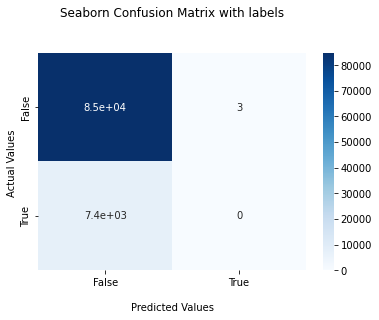

##### Conclusion:
The decision tree model hardly capture the pattern of minority class. It had almost zero ability to calssfiy the default class. It is not a good model to use in this case.

#### With resampling

##### With SMOTE

|              | precision | recall | f1-score | support |
|--------------|-----------|--------|----------|---------|
| 0            | 0.94      | 0.74   | 0.83     | 84806   |
| 1            | 0.13      | 0.46   | 0.21     | 7448    |
| accuracy     |           |        | 0.71     | 92254   |
| macro avg    | 0.54      | 0.60   | 0.52     | 92254   |
| weighted avg | 0.87      | 0.71   | 0.78     | 92254   |

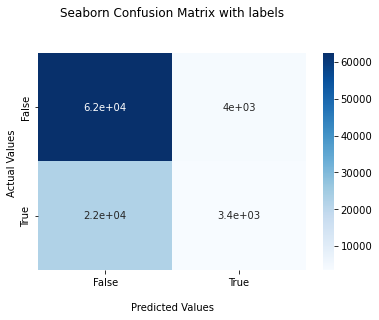

##### With SMOTE and undersampling

|              | precision | recall | f1-score | support |
|--------------|-----------|--------|----------|---------|
| 0            | 0.94      | 0.92   | 0.93     | 84806   |
| 1            | 0.24      | 0.29   | 0.26     | 7448    |
| accuracy     |           |        | 0.87     | 92254   |
| macro avg    | 0.59      | 0.60   | 0.60     | 92254   |
| weighted avg | 1         | 0.87   | 0.87     | 92254   |

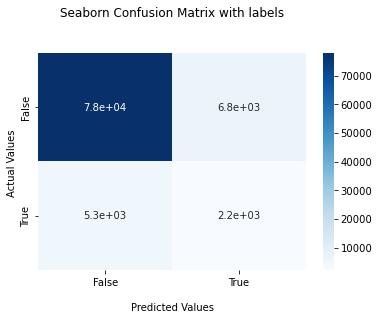

##### Conclusion:
After resampling the data, we can see that the data had more ability to detect the minority class. This is because the data was resampled to have a similar number of samples in each class. This is a good sign that the data is imbalanced.

## Bagging Model- Random Forest

#### Without resampling

|              | precision | recall | f1-score | support |
|--------------|-----------|--------|----------|---------|
| 0            | 0.92      | 1      | 0.96     | 84806   |
| 1            | 0.66      | 0.01   | 0.01     | 7448    |
| accuracy     |           |        | 0.92     | 92254   |
| macro avg    | 0.59      | 0.50   | 0.49     | 92254   |
| weighted avg | 0.9       | 0.92   | 0.88     | 92254   |

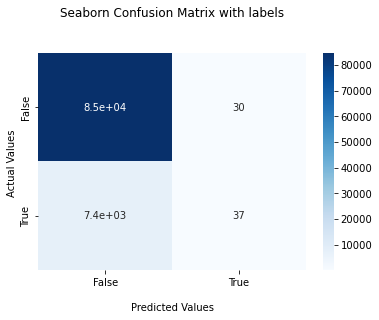

##### Conclusion:
We can see that even witout any resampling, the ensemble method of random forest still performed better than base model decision tree.

#### With resampling

##### With SMOTE

|              | precision | recall | f1-score | support |
|--------------|-----------|--------|----------|---------|
| 0            | 0.92      | 0.99   | 0.95     | 84806   |
| 1            | 0.22      | 0.05   | 0.08     | 7448    |
| accuracy     |           |        | 0.91     | 92254   |
| macro avg    | 0.57      | 0.52   | 0.51     | 92254   |
| weighted avg | 0.87      | 0.91   | 0.88     | 92254   |

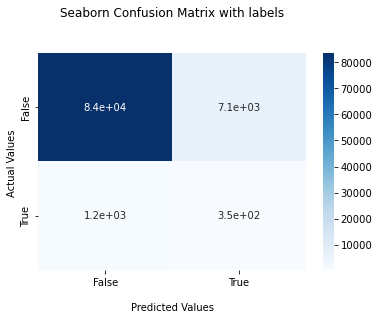

##### With SMOTE and undersampling

|              | precision | recall | f1-score | support |
|--------------|-----------|--------|----------|---------|
| 0            | 0.94      | 0.90   | 0.92     | 84806   |
| 1            | 0.22      | 0.34   | 0.27     | 7448    |
| accuracy     |           |        | 0.95     | 92254   |
| macro avg    | 0.58      | 0.52   | 0.59     | 92254   |
| weighted avg | 0.88      | 0.91   | 0.86     | 92254   |

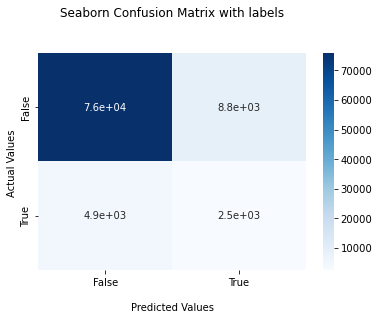

##### Conclusion:
Similar to what we saw in base model, resampling is a good way to improve the performance of the model. We can see that model had higher recall and precision than the model trained without resampling.

## Boosting Model- Gradient Boosting

#### Without resampling

|              | precision | recall | f1-score | support |
|--------------|-----------|--------|----------|---------|
| 0            | 0.92      | 1      | 0.96     | 84806   |
| 1            | 0.48      | 0.03   | 0.06     | 7448    |
| accuracy     |           |        | 0.92     | 92254   |
| macro avg    | 0.70      | 0.52   | 0.51     | 92254   |
| weighted avg | 0.89      | 0.92   | 0.89     | 92254   |

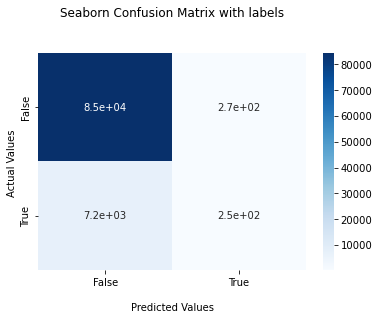

##### Conclusion:
After SMOTE resampling, we can not see obvious difference on the gradient boost model. It seems no improvement on the gradient boost model.

#### With resampling

##### With SMOTE

|              | precision | recall | f1-score | support |
|--------------|-----------|--------|----------|---------|
| 0            | 0.92      | 1      | 0.96     | 84806   |
| 1            | 0.44      | 0.03   | 0.06     | 7448    |
| accuracy     |           |        | 0.92     | 92254   |
| macro avg    | 0.68      | 0.51   | 0.51     | 92254   |
| weighted avg | 0.88      | 0.92   | 0.88     | 92254   |

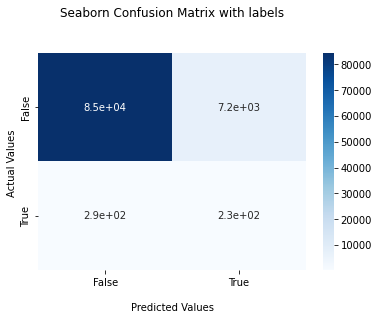

##### With SMOTE and undersampling

|              | precision | recall | f1-score | support |
|--------------|-----------|--------|----------|---------|
| 0            | 0.94      | 0.9    | 0.92     | 84806   |
| 1            | 0.25      | 0.40   | 0.31     | 7448    |
| accuracy     |           |        | 0.85     | 92254   |
| macro avg    | 0.60      | 0.65   | 0.61     | 92254   |
| weighted avg | 0.89      | 0.85   | 0.87     | 92254   |

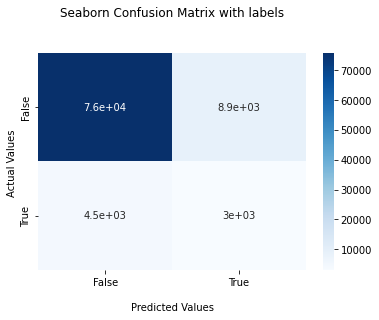

##### Conclusion:
But if we combine the undersampling and SMOTE techniques, we can get an obvious improvement in the precision and recall of the classifier.

# Summary

## 1. Does ensemble work better than simple models ?

From the comparative analysis in modeling section, we can ensemble models always perform better than simple models with the same resample methods.

## 2. Does resampling help modles to learn the pattern of minority class?

We can see that the models performance boosted after using resampling method in each model category.Therefore, resampling indeed helps the models to learn the pattern of the minority class in this dataset and problem statement.

## 3. How does Home Credit choose the type of combination of models and resampling?

If Home Credit want to filter out more default users, they should choose the combination can generate higher recall rate;
If Home Credit want to provide financial services to actual qualified users, they should choose the combination can generate higher precision rate;
If Home Credit trade-off two perspectives, they should choose the combination can generate higher F1 score.